<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Machine Learning - Dr. Abbas Hosseini
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Project
            	<br/>
			</font>
<font size=4>
			<br/>
      Amin Meghrazi<br/>
      Seyed Alireza Mousavizade<br/>
      Yashar Zoroufchi Banisi
</font>
    </div>

# Libraries and Packages

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns     

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Loading Training Dataset

In [2]:
path = "/content/drive/MyDrive/ML_dataset/train_dataset.csv"
df = pd.read_csv(path)
df.head()

,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,partner_id,user_id
0,0,-1.0,-1,2020-08-04 04:07:56,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,B69E439E41E0BEAD764ABF16D7FD96C9,-1,E3DDEB04F8AFF944B11943BB57D2F620,5E2C678F6586B67F61A377E1534E01FC
1,0,-1.0,-1,2020-08-04 01:47:40,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,404D3D9D03297504F3509032DCFA02F0,-1,E3DDEB04F8AFF944B11943BB57D2F620,E8247702C0DD294E0AE6B5B5E2F9E810
2,0,-1.0,-1,2020-08-04 16:54:31,-1,0.0,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,-1,C45A9AC6D102ACAEEDF0D6F78636D84A,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,-1,-1,-1,-1,-1,2AC62132FBCFA093B9426894A4BC6278,B09E51338E0EED59C5A859B13631C370,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...,12E43E51784BDE3CB9E0EF6310A7D5C5,9FD001258907F541D497040C64383696
3,0,-1.0,-1,2020-08-03 20:34:28,-1,0.0,-1,D7D1FB49049702BF6338894757E0D959,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,080614393A57816D7A655695E2DBE728,-1,E3DDEB04F8AFF944B11943BB57D2F620,225741ACF2DBB2E5948268F5D5D352E6
4,0,-1.0,-1,2020-08-03 20:54:17,1064,0.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,-1,1B491180398E2F0390E6A588B3BCE291,9B57D98465FD7D5AF39448DC29E95DC8,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,-1,-1,-1,989EEF92F2A525DD896557425EA7C4C7,350271BAFD7C7AAF6FB1424CF3DD4827,097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...,F0FD783189F55BAFC331AD347EAE6863,160A90377E54124D0BD31DB6735F0B33


# EDA

## Getting Primarily Insight

In [3]:
df.shape

(100000, 23)

In [4]:
df.columns

Index(['Sale', 'SalesAmountInEuro', 'time_delay_for_conversion',
       'click_timestamp', 'nb_clicks_1week', 'product_price',
       'product_age_group', 'device_type', 'audience_id', 'product_gender',
       'product_brand', 'product_category(1)', 'product_category(2)',
       'product_category(3)', 'product_category(4)', 'product_category(5)',
       'product_category(6)', 'product_category(7)', 'product_country',
       'product_id', 'product_title', 'partner_id', 'user_id'],
      dtype='object')

In [5]:
df.nunique(axis = 0)

Sale                             2
SalesAmountInEuro             8932
time_delay_for_conversion     9208
click_timestamp              67045
nb_clicks_1week               1138
product_price                 4496
product_age_group                9
device_type                      4
audience_id                   3182
product_gender                  11
product_brand                 4770
product_category(1)             22
product_category(2)            145
product_category(3)            699
product_category(4)            910
product_category(5)            442
product_category(6)             89
product_category(7)              1
product_country                 17
product_id                   45447
product_title                27695
partner_id                     183
user_id                      96766
dtype: int64

In [6]:
stats = df.describe()
stats

,Sale,SalesAmountInEuro,time_delay_for_conversion,nb_clicks_1week,product_price,product_category(7)
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.0
mean,0.136610,15.124148,4.372428e+04,236.545830,10.929187,-1.0
std,0.343437,147.248702,2.434087e+05,1153.037285,65.574247,0.0
min,0.000000,-1.000000,-1.000000e+00,-1.000000,0.000000,-1.0
25%,0.000000,-1.000000,-1.000000e+00,-1.000000,0.000000,-1.0
50%,0.000000,-1.000000,-1.000000e+00,0.000000,0.000000,-1.0
75%,0.000000,-1.000000,-1.000000e+00,49.000000,0.000000,-1.0
max,1.000000,23691.224980,2.554631e+06,25390.000000,3928.000000,-1.0


## Cleaning Dataset

### Removing Redundant Variables

In [13]:
df_dropped = df.copy().drop(['product_category(7)', 'product_title', 'audience_id'], axis = 1)
df_dropped.head()

,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_country,product_id,partner_id,user_id
0,0,-1.0,-1,2020-08-04 04:07:56,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,B69E439E41E0BEAD764ABF16D7FD96C9,E3DDEB04F8AFF944B11943BB57D2F620,5E2C678F6586B67F61A377E1534E01FC
1,0,-1.0,-1,2020-08-04 01:47:40,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,404D3D9D03297504F3509032DCFA02F0,E3DDEB04F8AFF944B11943BB57D2F620,E8247702C0DD294E0AE6B5B5E2F9E810
2,0,-1.0,-1,2020-08-04 16:54:31,-1,0.0,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,C45A9AC6D102ACAEEDF0D6F78636D84A,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,-1,-1,-1,-1,2AC62132FBCFA093B9426894A4BC6278,B09E51338E0EED59C5A859B13631C370,12E43E51784BDE3CB9E0EF6310A7D5C5,9FD001258907F541D497040C64383696
3,0,-1.0,-1,2020-08-03 20:34:28,-1,0.0,-1,D7D1FB49049702BF6338894757E0D959,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,080614393A57816D7A655695E2DBE728,E3DDEB04F8AFF944B11943BB57D2F620,225741ACF2DBB2E5948268F5D5D352E6
4,0,-1.0,-1,2020-08-03 20:54:17,1064,0.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,1B491180398E2F0390E6A588B3BCE291,9B57D98465FD7D5AF39448DC29E95DC8,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,-1,-1,989EEF92F2A525DD896557425EA7C4C7,350271BAFD7C7AAF6FB1424CF3DD4827,F0FD783189F55BAFC331AD347EAE6863,160A90377E54124D0BD31DB6735F0B33


In [8]:
null_columns = []
for column in df_dropped.columns:
  if column == 'click_timestamp':
    df_null = df_dropped[df_dropped[column] == 0]
    if df_null.shape[0] / df_dropped.shape[0] > 0.45:
      null_columns.append(column)
  else:
    df_null = df_dropped[df_dropped[column] == -1]
    if df_null.shape[0] / df_dropped.shape[0] > 0.45:
      null_columns.append(column)
df_less_null = df_dropped.copy().drop(null_columns, axis=1)
df_less_null.head()

,Sale,click_timestamp,product_price,product_age_group,device_type,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_country,product_id,product_title,partner_id,user_id
0,0,2020-08-04 04:07:56,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,B69E439E41E0BEAD764ABF16D7FD96C9,-1,E3DDEB04F8AFF944B11943BB57D2F620,5E2C678F6586B67F61A377E1534E01FC
1,0,2020-08-04 01:47:40,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,404D3D9D03297504F3509032DCFA02F0,-1,E3DDEB04F8AFF944B11943BB57D2F620,E8247702C0DD294E0AE6B5B5E2F9E810
2,0,2020-08-04 16:54:31,0.0,4C90FD52FC53D2C1C205844CB69575AB,FF2C446555E3822B0E0FC3406116E86D,C45A9AC6D102ACAEEDF0D6F78636D84A,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,-1,-1,-1,-1,2AC62132FBCFA093B9426894A4BC6278,B09E51338E0EED59C5A859B13631C370,3DF2BEDE6A8FDFA7F97B97FFF6EF38CC 516EE9C34B839...,12E43E51784BDE3CB9E0EF6310A7D5C5,9FD001258907F541D497040C64383696
3,0,2020-08-03 20:34:28,0.0,-1,D7D1FB49049702BF6338894757E0D959,-1,-1,-1,-1,-1,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,080614393A57816D7A655695E2DBE728,-1,E3DDEB04F8AFF944B11943BB57D2F620,225741ACF2DBB2E5948268F5D5D352E6
4,0,2020-08-03 20:54:17,0.0,4C90FD52FC53D2C1C205844CB69575AB,7E56C27BFF0305E788DA55A029EC4988,1B491180398E2F0390E6A588B3BCE291,9B57D98465FD7D5AF39448DC29E95DC8,13C26D10258053889D75D9B9CA922EC7,346AC0DECB71FFDC9114236B419D7814,1E629AECC2FB9BEF43331CBE8F2D7C08,341C9BD18A3277E6B104CAFC177DE796,-1,-1,989EEF92F2A525DD896557425EA7C4C7,350271BAFD7C7AAF6FB1424CF3DD4827,097C90F8BF5398AC7C486804F0801DEE E09E084DB8937...,F0FD783189F55BAFC331AD347EAE6863,160A90377E54124D0BD31DB6735F0B33


### Removing Outliers

In [9]:
df_less_null.describe()

,Sale,product_price
count,100000.000000,100000.000000
mean,0.136610,10.929187
std,0.343437,65.574247
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,3928.000000


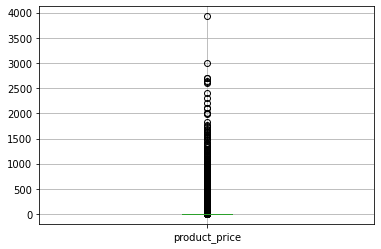

In [10]:
df_less_null.boxplot(column = 'product_price')

In [11]:
df_price_more_than_zero = df_less_null[df_less_null['product_price'] > 0]
df_price_more_than_zero.describe()

,Sale,product_price
count,12784.0,12784.000000
mean,1.0,85.491137
std,0.0,165.115302
min,1.0,0.180000
25%,1.0,15.830000
50%,1.0,35.565000
75%,1.0,87.420000
max,1.0,3928.000000


(98637, 18)

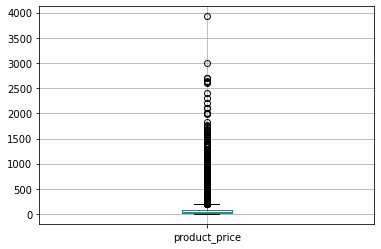

In [12]:
df_price_more_than_zero.boxplot(column='product_price')
q3 = df_price_more_than_zero['product_price'].quantile(0.75)
q1 = df_price_more_than_zero['product_price'].quantile(0.25)
upper_bound = q3 + 1.5 * (q3 - q1)
df_inlier = df_less_null[df_less_null['product_price'] <= upper_bound]
df_inlier.shape